In [20]:
# July 21, 2023 - Attempt 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://github.com/kimichenn/nord-deep-mpl-stylesheet/raw/main/nord-deep.mplstyle')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df = df.drop(columns=["PassengerId", "Name", "Ticket"])

In [5]:
# Age, Cabin, and Embarked has NaN
# 177 counts with Age
# 687 counts with Cabin
# 2 counts for Embarked
df = df.drop(columns="Cabin")
df = df.dropna(subset=["Embarked"])
df["Age"] = df["Age"].fillna(df["Age"].median())

In [6]:
df["Age"].median()

28.0

In [7]:
X = df.drop("Survived", axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
y = df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
embarked_dummies = pd.get_dummies(X["Embarked"], prefix="Embarked")
X = pd.concat([X.drop(columns="Embarked"), embarked_dummies], axis=1)

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,7.2500,0,0,1
1,1,female,38.0,1,0,71.2833,1,0,0
2,3,female,26.0,0,0,7.9250,0,0,1
3,1,female,35.0,1,0,53.1000,0,0,1
4,3,male,35.0,0,0,8.0500,0,0,1


In [11]:
Pclass_dummies = pd.get_dummies(X["Pclass"], prefix="Pclass")
X = pd.concat([X.drop(columns="Pclass"), Pclass_dummies], axis=1)

Sex_dummies = pd.get_dummies(X["Sex"], prefix="Sex")
X = pd.concat([X.drop(columns="Sex"), Sex_dummies], axis=1)

X.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,35.0,1,0,53.1000,0,0,1,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
res_dict = {}
for i in range(1, 101):
	clf = RandomForestClassifier(n_estimators=i)
	clf.fit(X_train, y_train)
	accuracy = clf.score(X_test, y_test)
	res_dict[i] = accuracy
	print(f"estimators: {i}, accuracy: {accuracy}")

estimators: 1, accuracy: 0.7191011235955056
estimators: 2, accuracy: 0.7528089887640449
estimators: 3, accuracy: 0.7471910112359551
estimators: 4, accuracy: 0.7640449438202247
estimators: 5, accuracy: 0.7415730337078652
estimators: 6, accuracy: 0.7752808988764045
estimators: 7, accuracy: 0.7865168539325843
estimators: 8, accuracy: 0.7752808988764045
estimators: 9, accuracy: 0.7752808988764045
estimators: 10, accuracy: 0.7921348314606742
estimators: 11, accuracy: 0.7752808988764045
estimators: 12, accuracy: 0.7865168539325843
estimators: 13, accuracy: 0.797752808988764
estimators: 14, accuracy: 0.8089887640449438
estimators: 15, accuracy: 0.7584269662921348
estimators: 16, accuracy: 0.7865168539325843
estimators: 17, accuracy: 0.7808988764044944
estimators: 18, accuracy: 0.7696629213483146
estimators: 19, accuracy: 0.7865168539325843
estimators: 20, accuracy: 0.7865168539325843
estimators: 21, accuracy: 0.7808988764044944
estimators: 22, accuracy: 0.7921348314606742
estimators: 23, accu

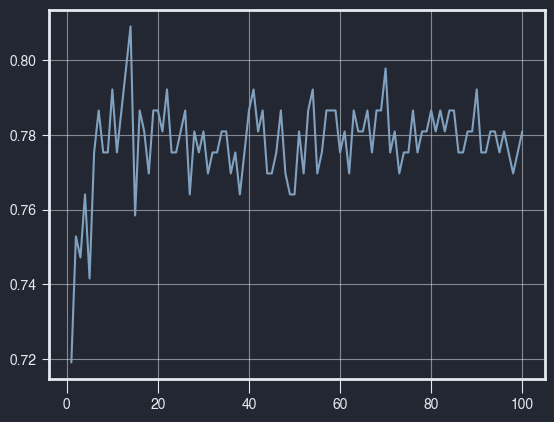

In [31]:
fig, ax = plt.subplots()
ax.plot(list(res_dict.keys()), list(res_dict.values()))

In [32]:
max(res_dict, key=res_dict.get)

14

In [33]:
clf.score(X_test, y_test)

0.7808988764044944

# Actual Test Set

In [61]:
df_test_original = pd.read_csv("test.csv")
df_test_original.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
df_test = df_test_original.copy(deep=True)
df_test.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)
df_test = df_test.drop(columns="Cabin")
df_test = df_test.dropna(subset=["Embarked"])
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].median())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())
df_test.isna().value_counts()

Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       418
dtype: int64

In [63]:
X = df_test
embarked_dummies = pd.get_dummies(X["Embarked"], prefix="Embarked")
X = pd.concat([X.drop(columns="Embarked"), embarked_dummies], axis=1)

Pclass_dummies = pd.get_dummies(X["Pclass"], prefix="Pclass")
X = pd.concat([X.drop(columns="Pclass"), Pclass_dummies], axis=1)

Sex_dummies = pd.get_dummies(X["Sex"], prefix="Sex")
X = pd.concat([X.drop(columns="Sex"), Sex_dummies], axis=1)

X.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,34.5,0,0,7.8292,0,1,0,0,0,1,0,1
1,47.0,1,0,7.0000,0,0,1,0,0,1,1,0
2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1
3,27.0,0,0,8.6625,0,0,1,0,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,0,1,1,0


In [68]:
X_transformed = scaler.fit_transform(X)
res = pd.DataFrame({"PassengerId": df_test_original["PassengerId"], "Survived": clf.predict(X)})
res.set_index("PassengerId", inplace=True)
res.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [69]:
res.to_csv("final_pred_2.csv")